The data was obtained from the PubChem database on Human Cannabinoid receptor 1 (CNR1). The dataset consists of 22,886 CNR1 compounds and their bioactivities. The dataset can be downloaded here: https://pubchem.ncbi.nlm.nih.gov/gene/1268#section=Chemicals-and-Bioactivities

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
#data_directory = os.path.join("/content/drive/MyDrive/UNTHSC/Github_projects/cannabinoid_project")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
! pip install lazypredict

In [2]:
pip install scikit-learn==1.1.3


In [73]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00


In [3]:
!pip install pubchempy

In [4]:
#Load the downloaded dataset
import pandas as pd
import pubchempy as pcp

df = pd.read_csv("/content/drive/MyDrive/UNTHSC/Github_projects/cannabinoid_project/pubchem_geneid_1268_bioactivity_gene.csv")
df.head(10)

,baid,acvalue,aid,sid,cid,geneid,pmid,aidtype,aidmdate,hasdrc,...,cmpdname,targetname,targeturl,ecs,repacxn,taxid,cellids,targettaxid,anatomyid,anatomy
0,101591097,3.500000e-07,328661,103513382,10435654,1268,18363352.0,Confirmatory,20220830,0,...,"Benzo(6,7)cyclohepta(1,2-C)pyrazole-3-carboxam...",CNR1 - cannabinoid receptor 1 (human),/gene/1268,NaN,P21554,9606,NaN,NaN,NaN,NaN
1,101623687,3.500000e-07,404801,103513382,10435654,1268,18512901.0,Confirmatory,20220830,0,...,"Benzo(6,7)cyclohepta(1,2-C)pyrazole-3-carboxam...",CNR1 - cannabinoid receptor 1 (human),/gene/1268,NaN,P21554,9606,NaN,NaN,NaN,NaN
2,363861771,1.000000e-05,1467903,381842384,16661352,1268,29111736.0,Confirmatory,20220830,0,...,CID 16661352,CNR1 - cannabinoid receptor 1 (human),/gene/1268,NaN,P21554,9606,NaN,NaN,NaN,NaN
3,373891693,2.000000e-05,1768789,469802310,164611580,1268,34413936.0,Confirmatory,20220830,0,...,N-(1-bicyclo[2.2.2]octanyl)-3-(4-oxidopyrazin-...,CNR1 - cannabinoid receptor 1 (human),/gene/1268,NaN,P21554,9606,NaN,NaN,NaN,NaN
4,373891698,2.000000e-05,1768789,469821419,164625379,1268,34413936.0,Confirmatory,20220830,0,...,"3-pyrazin-2-yl-N-(3-tricyclo[3.3.1.03,7]nonany...",CNR1 - cannabinoid receptor 1 (human),/gene/1268,NaN,P21554,9606,NaN,NaN,NaN,NaN
5,363861772,2.700000e-05,1467903,381842384,16661352,1268,29111736.0,Confirmatory,20220830,0,...,CID 16661352,CNR1 - cannabinoid receptor 1 (human),/gene/1268,NaN,P21554,9606,NaN,NaN,NaN,NaN
6,321571971,3.000000e-05,673842,160680247,70686524,1268,24900484.0,Confirmatory,20220830,0,...,N-[(8R)-2-(2-chlorophenyl)-3-(4-chlorophenyl)-...,CNR1 - cannabinoid receptor 1 (human),/gene/1268,NaN,P21554,9606,198.0,NaN,NaN,NaN
7,363469647,3.000000e-05,1350536,404656750,138491556,1268,29856219.0,Confirmatory,20220830,0,...,"(4Z,7Z)-N-cyclopropyl-9-[3-[(2Z,5Z,8Z)-undeca-...",CNR1 - cannabinoid receptor 1 (human),/gene/1268,NaN,P21554,9606,NaN,NaN,NaN,NaN
8,402319350,3.000000e-05,1806908,104129941,138491556,1268,NaN,Confirmatory,20230307,0,...,"(4Z,7Z)-N-cyclopropyl-9-[3-[(2Z,5Z,8Z)-undeca-...",CNR1 - cannabinoid receptor 1 (human),/gene/1268,NaN,P21554,9606,NaN,NaN,NaN,NaN
9,321571970,4.000000e-05,673842,160696461,12000836,1268,24900484.0,Confirmatory,20220830,0,...,"N-[2-(2-chlorophenyl)-3-(4-chlorophenyl)-5,6,7...",CNR1 - cannabinoid receptor 1 (human),/gene/1268,NaN,P21554,9606,198.0,NaN,NaN,NaN


In [5]:
print(df['cid'])

0         10435654
1         10435654
2         16661352
3        164611580
4        164625379
           ...    
22881    134691741
22882    171358032
22883    163183769
22884    171356143
22885    168446849
Name: cid, Length: 22886, dtype: int64


In [6]:
print(df['acvalue'])

0        3.500000e-07
1        3.500000e-07
2        1.000000e-05
3        2.000000e-05
4        2.000000e-05
             ...     
22881             NaN
22882             NaN
22883             NaN
22884             NaN
22885             NaN
Name: acvalue, Length: 22886, dtype: float64


In [7]:
#Select first 100 CNR1 compounds from the database
df_new = df.iloc[:200]

In [8]:
df_new.shape

(200, 27)

In [9]:
!pip install rdkit-pypi -qqq
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from matplotlib import pyplot as plt
%matplotlib inline
from rdkit.Chem import AllChem
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Descriptors


# Webscrape the canonical smiles from PubChemPy

In [10]:
#CID -- is a PubChem Compound Identification; a non-zero integer PubChem accession identifier for a unique chemical structure
#The cid's in the dataframe was used to collect the SMILES strings of all the compounds from PubChem Database.
#SMILES is a line notation for describing the structure of chemical species

import time
import pubchempy as pcp

# Function to get properties with retry logic and rate limiting
def get_properties_with_retry(cids, retries=5, delay=2):
    for i in range(retries):
        try:
            props = pcp.get_properties('CanonicalSMILES', cids, as_dataframe=True)
            return props
        except pcp.PubChemHTTPError as e:
            print(f"Attempt {i+1} failed: {e}")
            if i < retries - 1:
                time.sleep(delay)
                delay *= 2  # Exponential backoff
            else:
                raise

# List to store SMILES
mol_smiles = []

# Batch size for requests
batch_size = 10

# Iterate over dataframe in batches
for start in range(0, len(df_new), batch_size):
    end = start + batch_size
    batch_cids = df_new['cid'].iloc[start:end].tolist()

    try:
        # Get properties for the current batch
        props = get_properties_with_retry(batch_cids)

        for index, row in props.iterrows():
            mol_smiles.append(row['CanonicalSMILES'])
    except pcp.PubChemHTTPError:
        print(f"Failed to retrieve properties for batch {batch_cids} after several attempts.")

    # Rate limiting: delay between batches
    time.sleep(1)  # Adjust the sleep duration as needed to reduce server load

print(f"Retrieved {len(mol_smiles)} SMILES structures.")


Retrieved 200 SMILES structures.


In [11]:
#Create a dataframe of the compounds SMILES strings
cann = pd.DataFrame(mol_smiles, columns=['SMILES'])
cann.head(5)

,SMILES
0,C1CCN(CC1)NC(=O)C2=NN(C3=C2CCCC4=C3C=CC(=C4)Cl...
1,C1CCN(CC1)NC(=O)C2=NN(C3=C2CCCC4=C3C=CC(=C4)Cl...
2,CC1=C(N=C(N1C2=CC=C(C=C2)OS(=O)(=O)CCC(F)(F)F)...
3,C1CC2C3=C(CC1O2)C(=NN3C4=NC=C[N+](=C4)[O-])C(=...
4,C1CC2C3=C(CC1O2)C(=NN3C4=NC=CN=C4)C(=O)NC56CC7...


#Visualize the structure of all the selected compounds in a grid from

In [12]:
!pip install rdkit mols2grid
import mols2grid
mols2grid.display(cann, smiles_col="SMILES")

MolGridWidget()

In [13]:
#Save the DataFrame of SMILES
cann.to_csv('/content/drive/MyDrive/UNTHSC/Github_projects/cannabinoid_project/cann.csv', index=False)

# Chemical feature extraction using PubChemPy

In [14]:
#Scrape properties of compounds from PubChem
data = []

for i in cann['SMILES']:
    props = pcp.get_properties(['CanonicalSMILES','MolecularWeight','XLogP', 'ExactMass', 'MonoisotopicMass', 'TPSA', 'Complexity', 'Charge',
                                'HBondDonorCount', 'HBondAcceptorCount', 'RotatableBondCount',
                                'HeavyAtomCount', 'IsotopeAtomCount', 'AtomStereoCount',
                                'DefinedAtomStereoCount', 'UndefinedAtomStereoCount', 'BondStereoCount',
                                'DefinedBondStereoCount', 'UndefinedBondStereoCount', 'CovalentUnitCount',
                                'Volume3D', 'XStericQuadrupole3D', 'YStericQuadrupole3D',
                                'ZStericQuadrupole3D', 'FeatureCount3D', 'FeatureAcceptorCount3D',
                                'FeatureDonorCount3D', 'FeatureAnionCount3D', 'FeatureCationCount3D',
                                'FeatureRingCount3D', 'FeatureHydrophobeCount3D', 'ConformerModelRMSD3D',
                                'EffectiveRotorCount3D', 'ConformerCount3D'], i, 'smiles')
    data.append(props)


In [15]:
len(data[0][0].keys())

35

In [16]:
#Append the newly found properties in the dataframe
rows = []
columns = data[0][0].keys()
for i in range(100):
    rows.append(data[i][0].values())
props_df = pd.DataFrame(data=rows, columns=columns)
props_df.head()

,CID,MolecularWeight,CanonicalSMILES,XLogP,ExactMass,MonoisotopicMass,TPSA,Complexity,Charge,HBondDonorCount,...,FeatureCount3D,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D
0,10435654,489.8,C1CCN(CC1)NC(=O)C2=NN(C3=C2CCCC4=C3C=CC(=C4)Cl...,7.0,488.093744,488.093744,50.2,663.0,0.0,1.0,...,8.0,2.0,1.0,0.0,0.0,5.0,0.0,0.8,5.8,10.0
1,10435654,489.8,C1CCN(CC1)NC(=O)C2=NN(C3=C2CCCC4=C3C=CC(=C4)Cl...,7.0,488.093744,488.093744,50.2,663.0,0.0,1.0,...,8.0,2.0,1.0,0.0,0.0,5.0,0.0,0.8,5.8,10.0
2,73301311,620.5,CC1=C(N=C(N1C2=CC=C(C=C2)OS(=O)(=O)CCC(F)(F)F)...,6.3,619.0922320,619.0922320,119.0,964.0,0.0,2.0,...,11.0,4.0,2.0,0.0,1.0,4.0,0.0,1.2,11.2,10.0
3,164611580,395.5,C1CC2C3=C(CC1O2)C(=NN3C4=NC=C[N+](=C4)[O-])C(=...,0.8,395.19573968,395.19573968,94.5,641.0,0.0,1.0,...,10.0,3.0,1.0,1.0,1.0,4.0,0.0,0.8,6.0,10.0
4,164625379,391.5,C1CC2C3=C(CC1O2)C(=NN3C4=NC=CN=C4)C(=O)NC56CC7...,2.0,391.20082506,391.20082506,81.9,689.0,0.0,1.0,...,10.0,4.0,1.0,0.0,1.0,4.0,0.0,0.8,5.8,10.0


In [17]:
#Add the labels of the selected compounds to the new DataFrame. Activity Value is the label used.
props_df['ActivityValue(microM)'] = df['acvalue']

#Save the new DataFrame as csv
props_df.to_csv('/content/drive/MyDrive/UNTHSC/Github_projects/cannabinoid_project/props_df.csv', index=False)
props_df.head()

,CID,MolecularWeight,CanonicalSMILES,XLogP,ExactMass,MonoisotopicMass,TPSA,Complexity,Charge,HBondDonorCount,...,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D,ActivityValue(microM)
0,10435654,489.8,C1CCN(CC1)NC(=O)C2=NN(C3=C2CCCC4=C3C=CC(=C4)Cl...,7.0,488.093744,488.093744,50.2,663.0,0.0,1.0,...,2.0,1.0,0.0,0.0,5.0,0.0,0.8,5.8,10.0,3.500000e-07
1,10435654,489.8,C1CCN(CC1)NC(=O)C2=NN(C3=C2CCCC4=C3C=CC(=C4)Cl...,7.0,488.093744,488.093744,50.2,663.0,0.0,1.0,...,2.0,1.0,0.0,0.0,5.0,0.0,0.8,5.8,10.0,3.500000e-07
2,73301311,620.5,CC1=C(N=C(N1C2=CC=C(C=C2)OS(=O)(=O)CCC(F)(F)F)...,6.3,619.0922320,619.0922320,119.0,964.0,0.0,2.0,...,4.0,2.0,0.0,1.0,4.0,0.0,1.2,11.2,10.0,1.000000e-05
3,164611580,395.5,C1CC2C3=C(CC1O2)C(=NN3C4=NC=C[N+](=C4)[O-])C(=...,0.8,395.19573968,395.19573968,94.5,641.0,0.0,1.0,...,3.0,1.0,1.0,1.0,4.0,0.0,0.8,6.0,10.0,2.000000e-05
4,164625379,391.5,C1CC2C3=C(CC1O2)C(=NN3C4=NC=CN=C4)C(=O)NC56CC7...,2.0,391.20082506,391.20082506,81.9,689.0,0.0,1.0,...,4.0,1.0,0.0,1.0,4.0,0.0,0.8,5.8,10.0,2.000000e-05


In [18]:
props_df['ActivityValue(microM)'] = props_df['ActivityValue(microM)']*1e6
props_df.head()

,CID,MolecularWeight,CanonicalSMILES,XLogP,ExactMass,MonoisotopicMass,TPSA,Complexity,Charge,HBondDonorCount,...,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D,ActivityValue(microM)
0,10435654,489.8,C1CCN(CC1)NC(=O)C2=NN(C3=C2CCCC4=C3C=CC(=C4)Cl...,7.0,488.093744,488.093744,50.2,663.0,0.0,1.0,...,2.0,1.0,0.0,0.0,5.0,0.0,0.8,5.8,10.0,0.35
1,10435654,489.8,C1CCN(CC1)NC(=O)C2=NN(C3=C2CCCC4=C3C=CC(=C4)Cl...,7.0,488.093744,488.093744,50.2,663.0,0.0,1.0,...,2.0,1.0,0.0,0.0,5.0,0.0,0.8,5.8,10.0,0.35
2,73301311,620.5,CC1=C(N=C(N1C2=CC=C(C=C2)OS(=O)(=O)CCC(F)(F)F)...,6.3,619.0922320,619.0922320,119.0,964.0,0.0,2.0,...,4.0,2.0,0.0,1.0,4.0,0.0,1.2,11.2,10.0,10.00
3,164611580,395.5,C1CC2C3=C(CC1O2)C(=NN3C4=NC=C[N+](=C4)[O-])C(=...,0.8,395.19573968,395.19573968,94.5,641.0,0.0,1.0,...,3.0,1.0,1.0,1.0,4.0,0.0,0.8,6.0,10.0,20.00
4,164625379,391.5,C1CC2C3=C(CC1O2)C(=NN3C4=NC=CN=C4)C(=O)NC56CC7...,2.0,391.20082506,391.20082506,81.9,689.0,0.0,1.0,...,4.0,1.0,0.0,1.0,4.0,0.0,0.8,5.8,10.0,20.00


In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
from tqdm.auto import tqdm

In [20]:
tqdm.pandas()

In [21]:
#Removal of rows with NaN values

props_df = props_df.dropna()
props_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CID,86.0,4.728167e+07,4.992739e+07,104850.00,1.153240e+07,16026959.50,7.330131e+07,1.646254e+08
XLogP,86.0,5.666279e+00,1.371441e+00,0.80,4.950000e+00,6.10,6.500000e+00,7.800000e+00
TPSA,86.0,7.656279e+01,2.528733e+01,35.60,5.620000e+01,69.80,1.020000e+02,1.190000e+02
Complexity,86.0,7.294767e+02,1.534040e+02,408.00,5.850000e+02,691.50,8.565000e+02,1.060000e+03
Charge,86.0,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.00,0.000000e+00,0.000000e+00
HBondDonorCount,86.0,1.081395e+00,6.364445e-01,0.00,1.000000e+00,1.00,1.000000e+00,3.000000e+00
HBondAcceptorCount,86.0,5.267442e+00,2.636506e+00,2.00,3.000000e+00,5.00,7.000000e+00,1.200000e+01
RotatableBondCount,86.0,5.651163e+00,1.902119e+00,3.00,4.000000e+00,5.00,7.750000e+00,1.000000e+01
HeavyAtomCount,86.0,3.359302e+01,4.406887e+00,27.00,3.000000e+01,32.50,3.700000e+01,4.300000e+01
IsotopeAtomCount,86.0,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.00,0.000000e+00,0.000000e+00


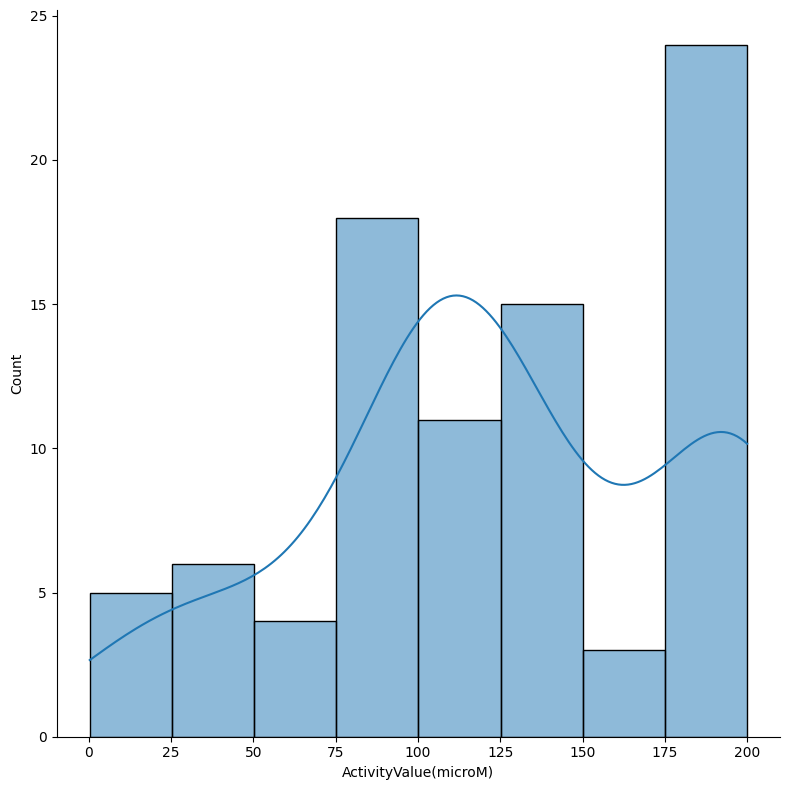

In [22]:
sns.displot(x= props_df["ActivityValue(microM)"],kind="hist",kde=True, height=8)

In [63]:
bins = [-np.inf, 100, 125, np.inf]
props_df['bin'] = pd.cut(props_df['ActivityValue(microM)'], bins=bins, labels=['Low', 'Medium', 'High'])

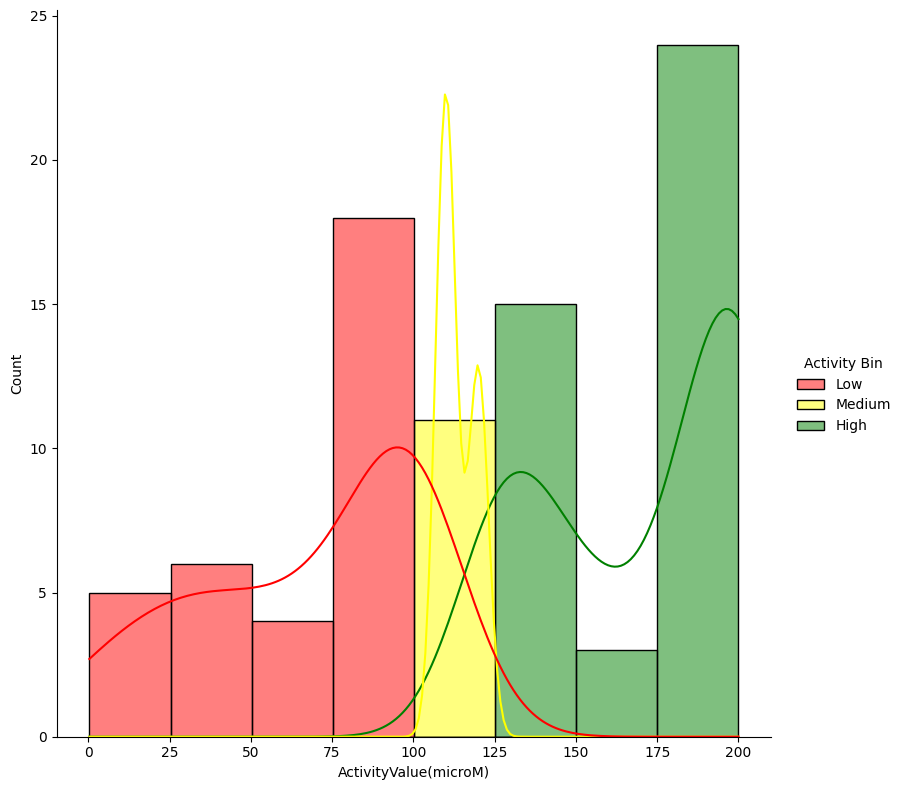

In [65]:
color_map_3 = {"Low":"red","Medium":"yellow","High":"green"}
g = sns.displot(x="ActivityValue(microM)",kind="hist",kde=True, height=8, hue="bin",data=props_df,palette=color_map_3)
g.fig.legends[0].set_title("Activity Bin")

Text(0.5, 0, 'Activity Bin')

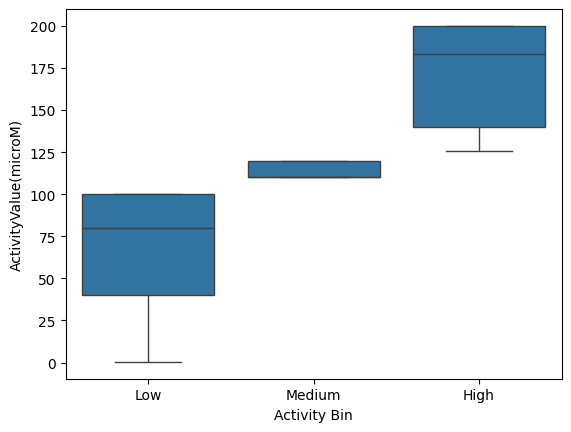

In [67]:
ax = sns.boxplot(x="bin",y="ActivityValue(microM)",data=props_df)
ax.set_xlabel("Activity Bin")

# Selected Features for model building

In [85]:
desc_columns = ['MolecularWeight','XLogP', 'TPSA', 'HBondDonorCount', 'HBondAcceptorCount','FeatureRingCount3D']
scaler = StandardScaler()
scaled_descriptors = scaler.fit_transform(props_df[desc_columns])

#Using Truncated Stochastic Neighbor Embedding (TSNE) to view the relationship between bioactivity and selected descriptors.

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from umap import UMAP

tsne = TSNE()
tsne_crds = tsne.fit_transform(scaled_descriptors)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


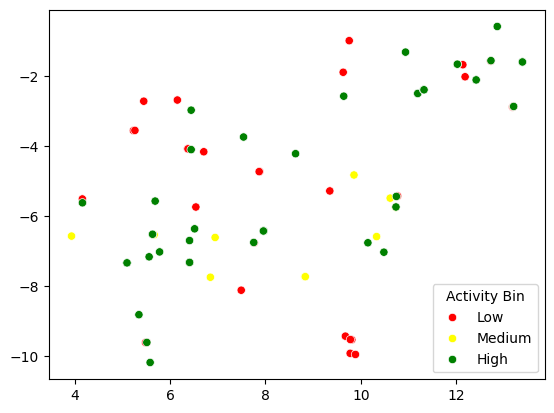

In [87]:
ax = sns.scatterplot(x=tsne_crds[:,0],y=tsne_crds[:,1],hue=props_df["bin"],palette=color_map_3)
ax.get_legend().set_title("Activity Bin")

#Uniform Manifold Approximation (UMAP) is an alternative way (better)




In [89]:
umap = UMAP()
umap_crds = umap.fit_transform(scaled_descriptors)

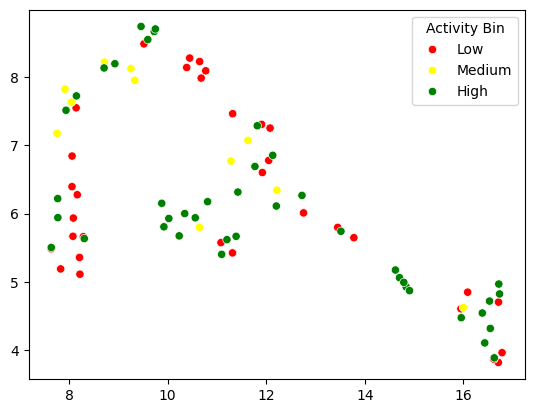

In [90]:
ax = sns.scatterplot(x=umap_crds[:,0],y=umap_crds[:,1],hue=props_df["bin"],palette=color_map_3)
ax.get_legend().set_title("Activity Bin")

# Generate Morgan fingerprints from SMILES

In [91]:
# #Each fingerprint bit corresponds to a fragment of the molecule.This would also be used as features for the predictive model

# from rdkit import Chem, DataStructs
# from rdkit.Chem import AllChem, Descriptors


# molecule_list=[]

# #Loop through the dataframe and process each row
# for index, row in props_df.iterrows():
#     smiles=row['CanonicalSMILES']

#     #Check if the SMILES notation is valid
#     mol = Chem.MolFromSmiles(smiles)
#     if mol is not None:
#         molecule_list.append(mol)

#     else:
#         print(f"Invalid SMILES at {index}: {smiles}")
# #Generate binary Morgan fingerprints with radius 2

# fp =[] #list of fingerprints for molecules
# for m in molecule_list:
#     fp.append(AllChem.GetMorganFingerprintAsBitVect(m, 2))
# print("Fingerprint of the first molecule")
# print(list(fp[0]))

#Convert fingerprints to 2D np.array

In [92]:
# import numpy as np

# #Convert fingerprints to 2D np.array
# def rdkit_numpy_convert(fp):
#     output=[]
#     for f in fp:
#         arr=np.zeros((1,))
#         DataStructs.ConvertToNumpyArray(f,arr)
#         output.append(arr)
#     return np.asarray(output)

In [28]:
# Finprint = rdkit_numpy_convert(fp) #Matrix of descriptors

In [93]:
# Finprint.shape

# Convert Extracted/Original PubChem features to numpy array

In [94]:

props_new = props_df[desc_columns]
props_array= props_new.values
print(props_array)

[['489.8' 7.0 50.2 1.0 3.0 5.0]
 ['489.8' 7.0 50.2 1.0 3.0 5.0]
 ['620.5' 6.3 119.0 2.0 9.0 4.0]
 ['395.5' 0.8 94.5 1.0 5.0 4.0]
 ['391.5' 2.0 81.9 1.0 5.0 4.0]
 ['620.5' 6.3 119.0 2.0 9.0 4.0]
 ['444.3' 5.5 56.2 1.0 3.0 4.0]
 ['444.3' 5.5 56.2 1.0 3.0 4.0]
 ['366.4' 2.4 91.8 0.0 7.0 4.0]
 ['393.4' 1.8 81.9 1.0 8.0 4.0]
 ['484.4' 6.5 56.2 1.0 3.0 5.0]
 ['386.6' 6.4 49.7 2.0 3.0 3.0]
 ['384.5' 1.3 119.0 0.0 7.0 4.0]
 ['619.5' 7.0 102.0 1.0 9.0 4.0]
 ['486.4' 4.8 65.4 1.0 4.0 5.0]
 ['470.3' 4.3 95.1 1.0 6.0 5.0]
 ['467.3' 5.2 79.9 1.0 4.0 4.0]
 ['425.5' 4.0 56.2 1.0 5.0 4.0]
 ['486.4' 4.8 65.4 1.0 4.0 5.0]
 ['516.0' 6.5 75.0 1.0 7.0 3.0]
 ['382.5' 6.8 49.7 2.0 3.0 3.0]
 ['546.5' 4.9 66.1 0.0 10.0 3.0]
 ['435.3' 5.1 50.5 0.0 5.0 4.0]
 ['439.2' 5.2 50.5 0.0 6.0 4.0]
 ['521.9' 7.8 35.6 0.0 2.0 5.0]
 ['487.4' 7.1 35.6 0.0 2.0 5.0]
 ['567.4' 4.7 101.0 2.0 5.0 5.0]
 ['535.5' 6.5 67.2 0.0 5.0 6.0]
 ['619.5' 7.0 102.0 1.0 9.0 4.0]
 ['617.4' 6.5 112.0 1.0 10.0 4.0]
 ['620.5' 6.3 119.0 2.0 9.0 4.0

#Concatenate the Fingerprint and Molecular descriptors

In [95]:
# combined = np.concatenate((Finprint, props_array), axis=1)
# print(combined)

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset

X = props_array
y = props_df['ActivityValue(microM)'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling of the features

In [97]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data (use the same scaler fitted on the training data)
X_test_scaled = scaler.transform(X_test)

# The scaled data is now ready to be used for model training
print(X_train_scaled[:1])
print(X_test_scaled[:1])

[[-0.70427381 -0.17526578 -0.7679146  -0.13403012 -0.86212637 -0.20696492]]
[[ 0.96986997 -1.57739203  1.30751116 -0.13403012  2.56398622 -0.20696492]]


## Spot Checking Algorithms

In [99]:
# Defines and builds the lazyclassifier
from sklearn.metrics import matthews_corrcoef
import lazypredict
import numpy as np
from lazypredict.Supervised import LazyRegressor

rg = LazyRegressor(verbose=-1,ignore_warnings=True)

models_train,predictions_train = rg.fit(X_train_scaled, X_train_scaled, y_train, y_train)
models_val,predictions_val = rg.fit(X_train_scaled, X_test_scaled, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
100%|██████████| 42/42 [00:02<00:00, 17.99it/s]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 68, number of used features: 4
[LightGBM] [Info] Start training from score 121.568383
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

100%|██████████| 42/42 [00:03<00:00, 10.59it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 68, number of used features: 4
[LightGBM] [Info] Start training from score 121.568383
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [100]:
models_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.76,0.78,25.10,0.01
ExtraTreeRegressor,0.76,0.78,25.10,0.01
ExtraTreesRegressor,0.76,0.78,25.10,0.09
GaussianProcessRegressor,0.76,0.78,25.10,0.01
XGBRegressor,0.76,0.78,25.10,0.47
GradientBoostingRegressor,0.74,0.77,25.80,0.05
RandomForestRegressor,0.65,0.68,30.06,0.20
BaggingRegressor,0.59,0.63,32.48,0.02
AdaBoostRegressor,0.33,0.39,41.66,0.03


In [101]:
models_val

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
AdaBoostRegressor,0.12,0.43,48.98,0.05
RandomForestRegressor,-0.09,0.29,54.45,0.13
XGBRegressor,-0.28,0.17,58.95,0.04
BaggingRegressor,-0.30,0.16,59.34,0.04
GradientBoostingRegressor,-0.31,0.15,59.58,0.07
KNeighborsRegressor,-0.33,0.14,60.07,0.01
ExtraTreesRegressor,-0.36,0.12,60.83,0.14
HistGradientBoostingRegressor,-0.44,0.07,62.50,1.71
OrthogonalMatchingPursuitCV,-0.44,0.07,62.60,0.02


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, 'AdaBoostRegressor'),
  Text(1, 0, 'RandomForestRegressor'),
  Text(2, 0, 'XGBRegressor'),
  Text(3, 0, 'BaggingRegressor'),
  Text(4, 0, 'GradientBoostingRegressor'),
  Text(5, 0, 'KNeighborsRegressor'),
  Text(6, 0, 'ExtraTreesRegressor'),
  Text(7, 0, 'HistGradientBoostingRegressor'),
  Text(8, 0, 'OrthogonalMatchingPursuitCV'),
  Text(9, 0, 'OrthogonalMatchingPursuit'),
  Text(10, 0, 'LGBMRegressor'),
  Text(11, 0, 'LinearRegression'),
  Text(12, 0, 'TransformedTargetRegressor'),
  Text(13, 0, 'Lars'),
  Text(14, 0, 'Ridge'),
  Text(15, 0, 'RidgeCV'),
  Text(16, 0, 'Lasso'),
  Text(17, 0, 'PoissonRegressor'),
  Text(18, 0, 'LassoLarsIC'),
  Text(19, 0, 'DecisionTreeRegressor'),
  Text(20, 0, 'SGDRegressor'),
  Text(21, 0, 'Elastic

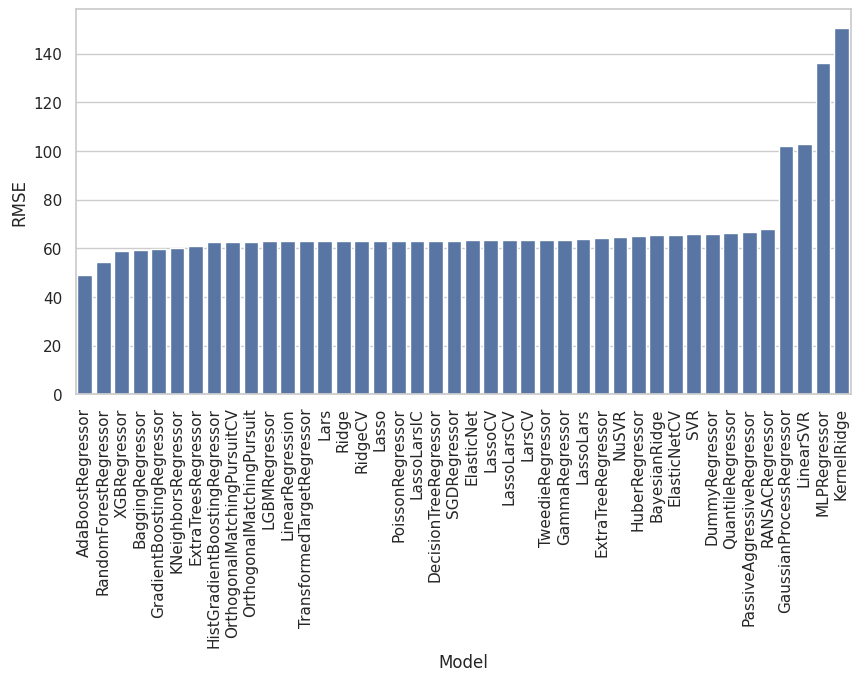

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=models_val.index, y="RMSE", data=models_val)
plt.xticks(rotation=90)

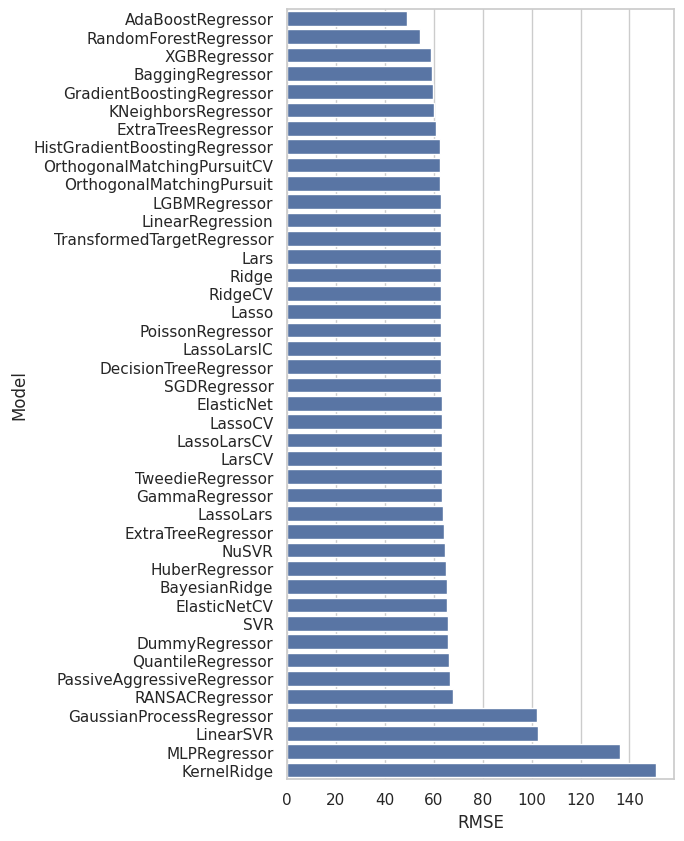

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_val.index, x="RMSE", data=models_val)

# Random Forest

In [109]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit the model on the training data
rf_regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [110]:
# Predict on the test data
y_pred = rf_regressor.predict(X_test_scaled)

# Calculate the Mean Absolute Error
rf_mae = mean_absolute_error(y_test, y_pred)
print(f'Random Forest MAE: {rf_mae}')

Random Forest MAE: 47.46351031746034


# Support Vector Machine

In [111]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize SVR model
svr_model = SVR(kernel='rbf')  # You can choose different kernels like 'linear', 'poly', 'rbf', etc.

# Train the model
svr_model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = svr_model.predict(X_test_scaled)

# Calculate the Mean Absolute Error
sv_mae = mean_absolute_error(y_test, y_pred)
print(f'Support vector MAE: {sv_mae}')

Support vector MAE: 58.53328994072332


# Decision Tree

In [113]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Initialize Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = dt_regressor.predict(X_test_scaled)

# Calculate the Mean Absolute Error
dt_mae = mean_absolute_error(y_test, y_pred)
print(f'Decision Tree MAE: {dt_mae}')

Decision Tree MAE: 48.455555555555556


# XGBoost

In [139]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror')  # 'reg:squarederror' for regression

# Train the model
xgb_regressor.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = xgb_regressor.predict(X_test_scaled)

# Calculate the Mean Absolute Error
xb_mae = mean_absolute_error(y_test, y_pred)
print(f'XGBOOST MAE: {xb_mae}')

XGBOOST MAE: 45.70308292541239


# Hyperparameter tuning

In [144]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np

# Define the RandomForest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid,
                           scoring='neg_mean_absolute_error', cv=5, verbose=1, n_jobs=-1)


# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Predict using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model performance
mse = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mse:.2f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Mean Absolute Error: 47.10


# Plot predicted vs. experimental activity

[Text(0, 0.5, 'Predicted bioactivity')]

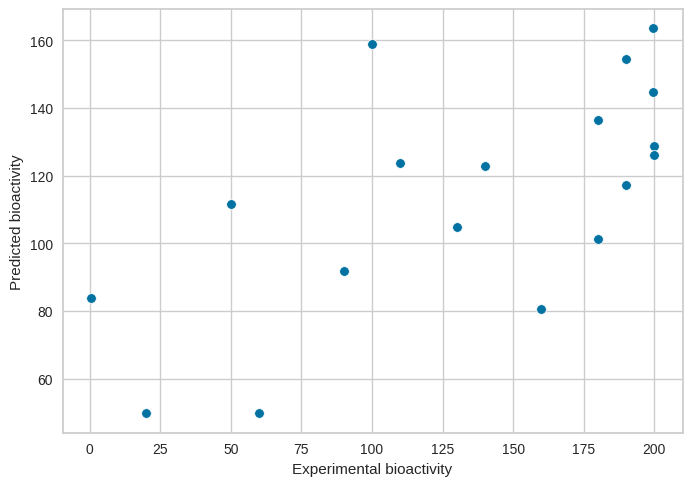

In [161]:
ax = sns.scatterplot(x=y_test,y=y_pred)
ax.set(xlabel="Experimental bioactivity")
ax.set(ylabel="Predicted bioactivity")

[Text(0, 0.5, 'Predicted bioactivity')]

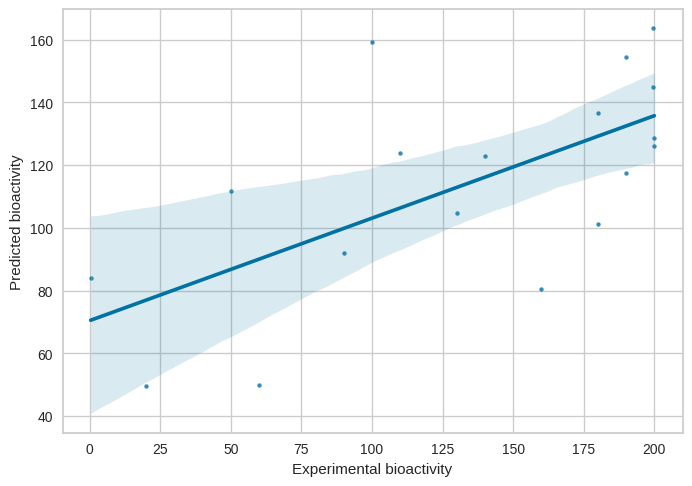

In [162]:
ax = sns.regplot(x=y_test,y=y_pred,scatter_kws={'s':10})
ax.set(xlabel="Experimental bioactivity")
ax.set(ylabel="Predicted bioactivity")

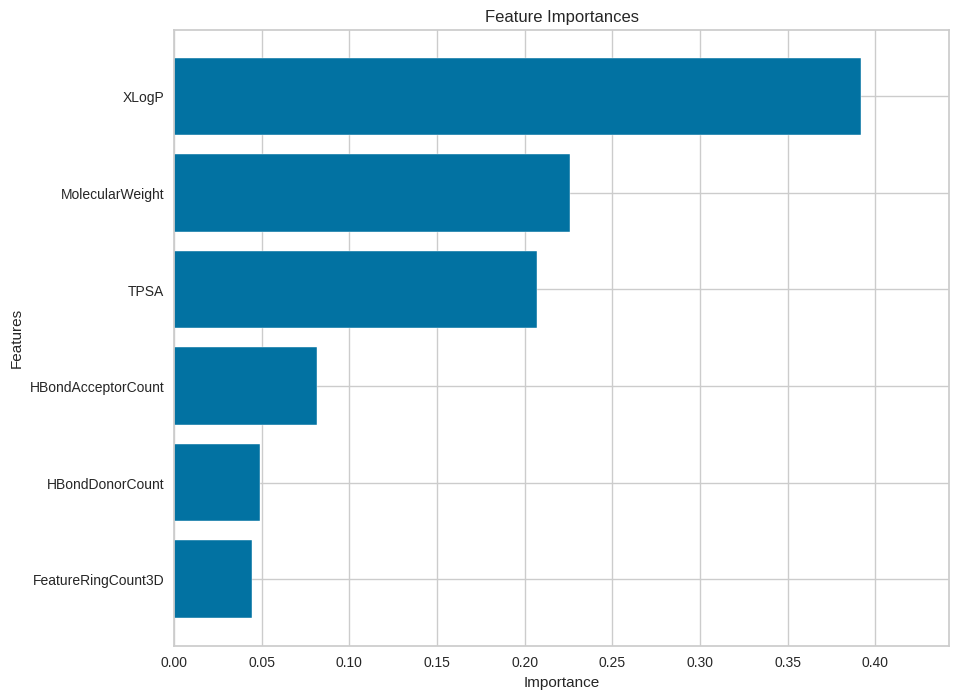

In [163]:
# Calculate feature importances
importances = best_model.feature_importances_
feature_names=['MolecularWeight', 'XLogP', 'TPSA', 'HBondDonorCount', 'HBondAcceptorCount', 'FeatureRingCount3D']

# Convert feature_names to a NumPy array for proper indexing
feature_names = np.array(feature_names)

# Plot feature importances
plt.figure(figsize=(10, 8))
indices = np.argsort(importances)  # Sort the feature importances in descending order
plt.title('Feature Importances')
plt.barh(range(X.shape[1]), importances[indices], align='center')  # Use horizontal bars
plt.yticks(range(X.shape[1]), feature_names[indices])  # Use feature names as y-ticks
plt.xlim([0, max(importances) + 0.05])  # Set x-limit for better visibility
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


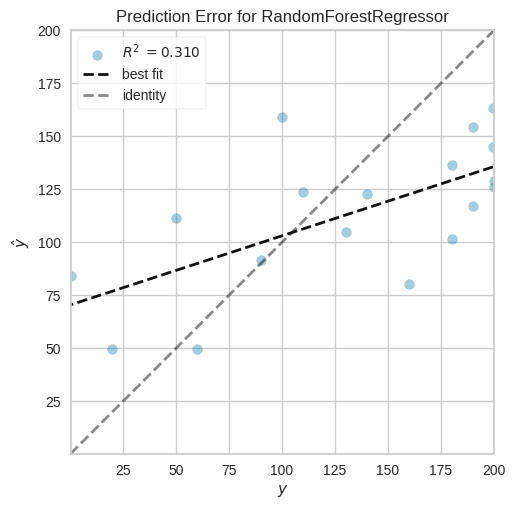

In [158]:
from yellowbrick.regressor import prediction_error, ResidualsPlot

visualizer = prediction_error(best_model, X_train_scaled, y_train, X_test_scaled, y_test,alpha=0.35)

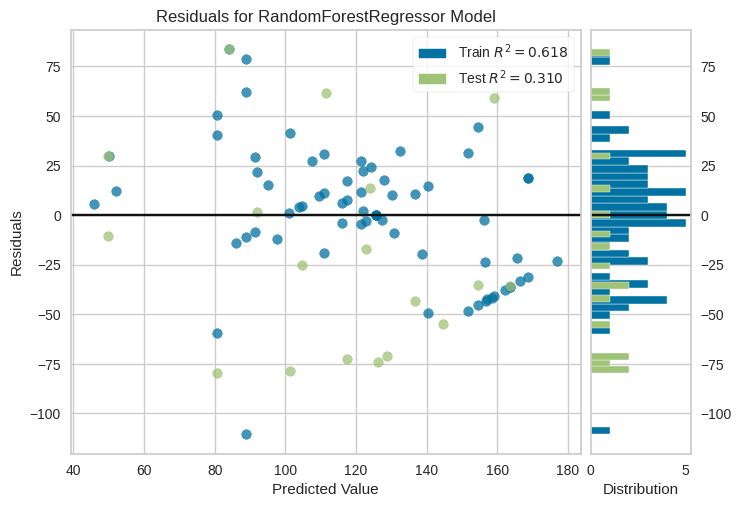

In [159]:
visualizer = ResidualsPlot(best_model)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show();